<a href="https://colab.research.google.com/github/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management/blob/master/src/Markowitz2_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import *
import os
import re

In [2]:
!git clone https://github.com/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management.git

Cloning into 'MA574_Portfolio-Valuation-and-Risk-Management'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 945 (delta 2), reused 0 (delta 0), pack-reused 937
Receiving objects: 100% (945/945), 3.79 MiB | 5.44 MiB/s, done.
Resolving deltas: 100% (440/440), done.


In [3]:
cd MA574_Portfolio-Valuation-and-Risk-Management/src/project3/week1/

/content/MA574_Portfolio-Valuation-and-Risk-Management/src/project3/week1


In [0]:
#Load data
os.chdir('/content/MA574_Portfolio-Valuation-and-Risk-Management/src/project3/week1/')
file_chdir = os.getcwd()
filecsv_list = []
for root,dirs,files in os.walk(file_chdir):
  for file in files:
    if os.path.splitext(file)[1] == '.csv' and os.path.splitext(file)[0] != 'VXX':
      filecsv_list.append(file)
R = pd.DataFrame()
for csv in filecsv_list:
  name = re.sub(u"\\(.*?\\)", "", csv)
  data = pd.read_csv(csv)
  #calculate return
  R[name.strip('.csv')] = np.array([np.log(data['Adj Close'][j]/data['Adj Close'][j-1]) for j in range(1,len(data['Adj Close']))])
 

In [0]:
filecsv_list

In [0]:
def ghm(R_expect,R_cov):
  one = np.ones((len(R_expect),1))
  A = np.dot(np.dot(one.reshape(1,-1),inv(R_cov)),R_expect)
  B = np.dot(np.dot(R_expect.reshape(1,-1),inv(R_cov)),R_expect)
  C = np.dot(np.dot(one.reshape(1,-1),inv(R_cov)),one)
  D = B*C - A**2
  g = (B * np.dot(inv(R_cov), one) - A* np.dot(inv(R_cov), R_expect))/D
  h = (C * np.dot(inv(R_cov), R_expect) - A* np.dot(inv(R_cov), one))/D
  min_sigma = np.dot(np.dot(g.reshape(1,-1),R_cov),g) - (np.dot(np.dot(h.reshape(1,-1),R_cov),g)**2)/np.dot(np.dot(h.reshape(1,-1),R_cov),h)
  return g,h,min_sigma

In [0]:
def effcientfrontier(g,h,R_cov,N1,N2):
  sigma = []
  mu = []
  weight = []
  before_ = np.inf
  for i in range(N1,N2):
      w = g + h*0.00000001*i
      sigma_ = 250*np.dot(np.dot(w.reshape(1,-1),R_cov),w)[0][0]
      if sigma_ > before_:
        sigma.append(np.sqrt((np.exp(sigma_)-1)*np.exp(2*0.00000001*i*250 + sigma_))*100)
        weight.append(w)
        mu.append((np.exp(0.00000001*i*250 + sigma_/2)-1)*100)
      before_ = sigma_
  return sigma,mu,weight

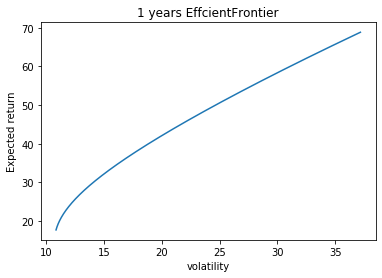

In [10]:
#1 years effcientFronter
R_cov =  np.array(R.cov())
R_expect = np.array(R.mean()).reshape(-1,1)
g1,h1,min_sigma1 = ghm(R_expect,R_cov)
sigma1,mu1,weight1 = effcientfrontier(g1,h1,R_cov,2000,200000)
plt.plot(sigma1,mu1)
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.title("1 years EffcientFrontier")
plt.show()

In [11]:
weight1[0] # weight for minimum sigma(1 years)

array([[ 2.82128601e-02],
       [ 1.24171925e-01],
       [ 1.48363652e-02],
       [ 3.18832710e-02],
       [ 2.17293294e-02],
       [ 1.58491961e-02],
       [ 9.24170840e-02],
       [ 4.33380257e-02],
       [ 3.82113248e-02],
       [-2.38407065e-04],
       [ 3.01793642e-01],
       [-5.02563395e-03],
       [ 1.27078784e-01],
       [-1.81982962e-02],
       [ 4.50667741e-02],
       [ 1.44020071e-02],
       [ 1.77138982e-01],
       [-3.18246079e-02],
       [-5.19196700e-02],
       [ 3.10770446e-02]])

In [0]:
R_copy = R.copy()
vxx = pd.read_csv('VXX.csv')
R_copy['VXX'] = np.array([((vxx['Adj Close'][j]/vxx['Adj Close'][j-1])-1) for j in range(1,len(vxx['Adj Close']))])

In [13]:
R_mean = pd.DataFrame()
R_mean["1 year"] = R_copy.mean()
R_mean

,1 year
BAC,0.000899
KO,0.000484
FB,0.000488
PG,0.000524
LULU,0.001725
TEL,0.000634
JPM,0.000873
DIS,0.000539
VZ,0.000437
SKX,0.000656


In [14]:
R_var = pd.DataFrame()
R_var["1 year"] = R_copy.var()
R_var

,1 year
BAC,0.000230
KO,0.000081
FB,0.000350
PG,0.000101
LULU,0.000558
TEL,0.000167
JPM,0.000153
DIS,0.000145
VZ,0.000132
SKX,0.000963


In [16]:
R_sharpo = pd.DataFrame()
rf = 0.0158
rf_daily = (1 + rf)**(1/250) - 1
R_sharpo["1 year"] = (R_mean["1 year"] - rf_daily )/R_var["1 year"]
R_sharpo 

,1 year
BAC,3.633832
KO,5.175950
FB,1.216614
PG,4.567247
LULU,2.979618
TEL,3.413532
JPM,5.284104
DIS,3.271665
VZ,2.837340
SKX,0.615492


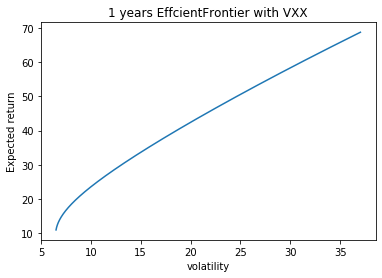

In [17]:
#1 years effcientFronter with VXX
R_cov4 =  np.array(R_copy.cov())
R_expect4 = np.array(R_copy.mean()).reshape(-1,1)
g4,h4,min_sigma4 = ghm(R_expect4,R_cov4)
sigma_v,mu_v,weight_v = effcientfrontier(g4,h4,R_cov4,2000,200000)
plt.plot(sigma_v,mu_v)
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.title("1 years EffcientFrontier with VXX")
plt.show()

In [0]:
#Find the maximun sharpe ratio
def sharpe_ratio(sigma_v,mu_v,rf):
  sharpe = 0
  m = 0
  for i in range(len(sigma_v)):
    k_t = (mu_v[i] - rf*100)/sigma_v[i]
    if k_t > sharpe:
      sharpe = k_t
      m = i
  return sharpe,m


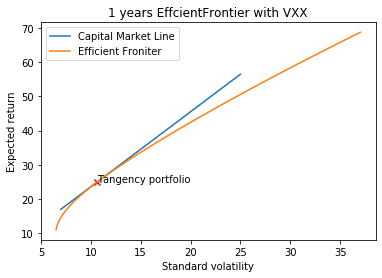

In [19]:
rf = 0.0158 # Choose 1 year US treasury rate as risk free rate
sigma_x = np.linspace(7,25,1000).reshape(-1,1)
sharpe,index_ = sharpe_ratio(sigma_v,mu_v,rf)
targent_v = (sharpe * sigma_x + rf*100).reshape(-1,1)
plt.plot(sigma_x,targent_v,label = "Capital Market Line")
plt.plot(sigma_v,mu_v,label = "Efficient Froniter")
plt.scatter(sigma_v[index_], mu_v[index_], color='r',marker = "x")
plt.text(sigma_v[index_], mu_v[index_],'Tangency portfolio',ha='left',fontsize=10)
plt.ylabel("Expected return")
plt.xlabel("Standard volatility")
plt.title("1 years EffcientFrontier with VXX")
plt.legend()
plt.show()


In [20]:
weight_v[index_]  # weight for tangency portfoilo

array([[ 0.05223718],
       [ 0.04150074],
       [-0.0224755 ],
       [-0.00414499],
       [ 0.08976811],
       [ 0.00234358],
       [ 0.27583754],
       [ 0.00154759],
       [ 0.00524084],
       [-0.00956312],
       [ 0.29347477],
       [ 0.09255746],
       [ 0.23137425],
       [ 0.03424598],
       [ 0.06887146],
       [-0.00233256],
       [-0.0855481 ],
       [ 0.00579821],
       [-0.22181489],
       [ 0.07542142],
       [ 0.07566003]])

In [0]:
filecsv_list

In [21]:
weight_v[index_]*500000

array([[  26118.58851702],
       [  20750.36868562],
       [ -11237.74966272],
       [  -2072.49543289],
       [  44884.05409239],
       [   1171.78854958],
       [ 137918.77048575],
       [    773.79443426],
       [   2620.41838146],
       [  -4781.55759772],
       [ 146737.38625926],
       [  46278.73136243],
       [ 115687.12463153],
       [  17122.98774791],
       [  34435.7300208 ],
       [  -1166.27789306],
       [ -42774.04808203],
       [   2899.10478588],
       [-110907.4472778 ],
       [  37710.71208477],
       [  37830.01590757]])

In [22]:
np.sum(np.abs(weight_v[index_]))/np.sum(weight_v[index_]) #leverage for the tangency portfoilo

1.6917583037849

In [0]:
def plot_corr_ellipses(data, ax=None, **kwargs):

    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

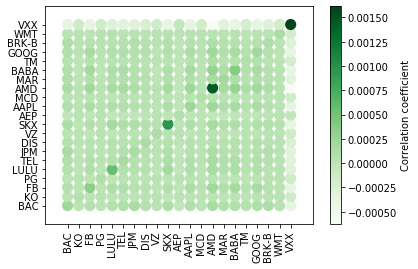

In [24]:
from matplotlib import pyplot as plt
from matplotlib.collections import EllipseCollection
data = R_copy.cov()
fig, ax = plt.subplots(1, 1)
m = plot_corr_ellipses(data, ax=ax, cmap='Greens')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')
ax.margins(0.1)

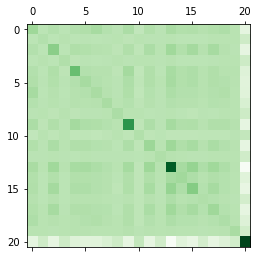

In [25]:
plt.matshow(R_copy.cov(),cmap = plt.cm.Greens)